In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import htfa_torch.htfa as HTFA

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
from scipy.spatial import distance
from scipy import stats
import nilearn.plotting as niplot
import statsmodels.stats.multitest as smt
from ordered_set import OrderedSet
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score,StratifiedKFold
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline

In [90]:
dtfa.num_blocks

618

In [4]:
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import cycler
from seaborn.apionly import color_palette
column_width = 3.3
page_width = 6.7
# colorblind-friendly colors 
# source: https://personal.sron.nl/~pault/
colors = {
    'bright': ['4477AA', 
               '66CCEE', 
               '228833', 
               'CCBB44', 
               'EE6677', 
               'AA3377', 
               'BBBBBB'],
    'high_contrast': ['FFFFFF', 
                      'DDAA33', 
                      'BB5566', 
                      '004488', 
                      '00000'],
    'vibrant': ['0077BB', 
                '33BBEE', 
                '0099BB',
                'EE7733',
                'CC3311',
                'EE3377',
                'BBBBBB'],
    'muted': ['332288',
              '88CCEE',
              '44AA99',
              '117733',
              '999933',
              'DDCC77',
              'CC6677',
              '882255',
              'AA4499']
}
pl.rc('legend', frameon=False)
pl.rc('figure', figsize=(column_width, 
                         0.66 * column_width),
                dpi=120)
pl.rc('savefig', dpi=300)
pl.rc('font', size=8)


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/zulqarnain

In [5]:
%matplotlib inline

In [6]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [7]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz')

In [8]:
dtfa = DTFA.DeepTFA([b for b in lepping_db.all() if 'response' not in b.task and 'tones' not in b.task],
                    mask='/home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz',num_factors=100, embedding_dim=2)

01/30/2020 14:57:28 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 14:57:30 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 14:57:31 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 14:57:32 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01

01/30/2020 14:58:05 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 14:58:06 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 14:58:08 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 14:58:09 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08

01/30/2020 14:58:42 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 14:58:44 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 14:58:45 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 14:58:46 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15

01/30/2020 14:59:19 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 14:59:21 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 14:59:22 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 14:59:23 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run4_music_m

01/30/2020 14:59:58 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd09_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 14:59:59 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd09_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 15:00:00 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd10_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 15:00:02 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd10_run2_music_mc_MNI_

01/30/2020 15:00:38 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd16_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 15:00:39 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 15:00:41 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 15:00:42 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run5_music_m

In [9]:
dtfa.load_state('data/lepping_noresponse_restz_k100_n1000_01302020_042320')

In [94]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in lepping_db.all() if b.task not in ['response', 'tones']], mask='/home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz', num_factors=100)

01/31/2020 10:53:51 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control03_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:53:54 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control04_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:53:56 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control04_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:53:58 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-contro

01/31/2020 10:54:41 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control10_run5_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:54:44 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control11_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:54:45 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control11_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:54:48 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control11

01/31/2020 10:55:33 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control17_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:55:35 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control18_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:55:37 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control18_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:55:39 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control18_ru

01/31/2020 10:56:19 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd04_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:56:21 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd05_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:56:23 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd05_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:56:25 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd05_run4_music_mc_M

01/31/2020 10:57:41 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd12_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:57:43 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd12_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:57:47 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd12_run5_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:57:50 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd13_run1_nonmusi

01/31/2020 10:59:11 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd19_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:59:14 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd19_run5_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 10:59:16 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)


In [95]:
htfa.load_state('data/lepping_noresponse_restz_k100_n1000_01302020_233405')

In [101]:
for blocks in htfa._blocks:
    print (blocks.task)

negative_music
positive_music
negative_music
positive_music
positive_music
negative_music
positive_music
negative_music
positive_nonmusic
negative_nonmusic
positive_nonmusic
negative_nonmusic
negative_nonmusic
positive_nonmusic
negative_nonmusic
positive_nonmusic
positive_music
negative_music
positive_music
negative_music
negative_music
positive_music
negative_music
positive_music
negative_nonmusic
positive_nonmusic
negative_nonmusic
positive_nonmusic
positive_nonmusic
negative_nonmusic
positive_nonmusic
negative_nonmusic
positive_nonmusic
negative_nonmusic
positive_nonmusic
negative_nonmusic
negative_nonmusic
positive_nonmusic
negative_nonmusic
positive_nonmusic
positive_music
negative_music
positive_music
negative_music
negative_music
positive_music
negative_music
positive_music
negative_nonmusic
positive_nonmusic
negative_nonmusic
positive_nonmusic
positive_nonmusic
negative_nonmusic
positive_nonmusic
negative_nonmusic
negative_music
positive_music
negative_music
positive_music
posi

In [62]:
validation_filter = lepping_db.inference_filter(training=False)
validation_blocks = [b for (b, block) in enumerate(dtfa._blocks) if validation_filter(block)]

In [104]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'negative_music'
    elif task == 'positive_music':
        task = 'positive_music'
    elif task == 'negative_nonmusic':
        task = 'negative_sounds'
    elif task == 'positive_nonmusic':
        task = 'positive_sounds'
    else:
        task = task.capitalize()
    return task

def music_sound_labeler(task):
    if 'music' in task_labeler(task):
        return 'music'
    elif 'sounds' in task_labeler(task):
        return 'sounds'
    
def positive_negative_labeler(task):
    if 'negative' in task_labeler(task):
        return 'negative'
    elif 'positive' in task_labeler(task):
        return 'positive'
    
def block_task_labeler(block):
    return task_labeler(block.task)

def block_music_sound_labeler(block):
    return music_sound_labeler(block.task)

def block_positive_negative_labeler(block):
    return positive_negative_labeler(block.task)

In [13]:
def subject_labeler(subject):
    return subject

def block_subject_labeler(block):
    return 'Subject %d' % block.subject

def subject_condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [149]:
def classification_pipeline(data,targets,session_labels,cv=LeaveOneGroupOut(),scoring="roc_auc",input_data=False,print_all=True):
    categories = np.unique(targets)
    overall_result = []
    overall_result_chance = []
    feature_selection = SelectPercentile(f_classif, percentile=5)
    category_result = {key:None for key in categories}
    for category in categories:
        print("Processing %s" % (category))
        svc = SVC(C=1., kernel="linear")
        if input_data:
            classifier = Pipeline([('anova', feature_selection), ('svc', svc)])
        else:
            classifier = svc
        dummy_classifier = DummyClassifier()

        classification_target = [t==category for t in targets]
        result = cross_val_score(
            classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
            scoring="roc_auc",
        )

        result_chance = cross_val_score(
            dummy_classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
            scoring="roc_auc",
        )
        
        category_result[category] = result
        overall_result.extend(result)
        overall_result_chance.extend(result_chance)
        if print_all:
            print("Scores: %1.4f +- %1.4f" % (
                result.mean(),
                result.std()))

            print("Chance Scores: %1.4f +- %1.4f" % (
                result_chance.mean(),
                result_chance.std()))
    
    if print_all:
        print ('...')
        print("Overall Score: %1.4f +- %1.4f" % (
        np.array(overall_result).mean(),
        np.array(overall_result).std()))

        print("Overall Dummy Score: %1.4f +- %1.4f" % (
        np.array(overall_result_chance).mean(),
        np.array(overall_result_chance).std()))

        print ("\n")
    return overall_result,overall_result_chance,category_result

In [150]:
dtfa_hyperparams = dtfa.variational.hyperparams.state_vardict()
all_weights_dtfa = dtfa_hyperparams['weights']['mu'].data.numpy()
all_weights_htfa = htfa.enc.hyperparams.block__weights__mu.data.numpy()
confidence = 0.95

In [151]:
### task classification using 5Fold CV on NTFA music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            #if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(music_sound_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

ntfa_mus_sounds_summary_means = ntfa_summary_means
dummy_mus_sounds_summary_means = dummy_summary_means

Processing Subject control01
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.2449
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.3162
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6000 +- 0.3202


Processing Subject control02
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.6000 +- 0.3742
Processing sounds
Scores: 0.8000 +- 0.4000
Chance Scores: 0.5500 +- 0.3317
...
Overall Score: 0.8750 +- 0.3010
Overall Dummy Score: 0.5750 +- 0.3544


Processing Subject control03
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.2915
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.8500 +- 0.2000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.7000 +- 0.2915


Processing Subject control04
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2236
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6

In [152]:
### task classification using 5Fold CV on HTFA music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_music_sound_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means
htfa_mus_sounds_summary_means = htfa_summary_means

Processing Subject control01
Processing music
Scores: 0.7500 +- 0.3873
Chance Scores: 0.4500 +- 0.1000
Processing sounds
Scores: 0.7500 +- 0.3873
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.7500 +- 0.3873
Overall Dummy Score: 0.4750 +- 0.0750


Processing Subject control02
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.3000 +- 0.1871
Processing sounds
Scores: 0.8000 +- 0.4000
Chance Scores: 0.7000 +- 0.1871
...
Overall Score: 0.8750 +- 0.3010
Overall Dummy Score: 0.5000 +- 0.2739


Processing Subject control03
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.1871
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.2000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4750 +- 0.2077


Processing Subject control04
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.5500 +- 0.3317
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.2449
...
Overall Score: 0.9250 +- 0.1601
Overall Dummy Score: 0.5

In [153]:
### task classification using 5Fold CV on input data music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(music_sound_labeler(block.task))
        print(targets)
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                 session_labels=None,
                                                                    cv=cv,
                                                                   scoring="roc_auc",
                                                                   input_data=True,
                                                                   print_all=True)

    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means
voxel_mus_sounds_summary_means = voxel_summary_means

Processing Subject control01
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.4500 +- 0.2449
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.0500 +- 0.1000
...
Overall Score: 0.9750 +- 0.0750
Overall Dummy Score: 0.2500 +- 0.2739


Processing Subject control02
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.4000 +- 0.2550
Processing sounds
Scores: 0.8000 +- 0.4000
Chance Scores: 0.5500 +- 0.3317
...
Overall Score: 0.8750 +- 0.3010
Overall Dummy Score: 0.4750 +- 0.3052


Processing Subject control03
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Proc

Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 0.9750 +- 0.0750
Overall Dummy Score: 0.4750 +- 0.3250


Processing Subject mdd02
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.2915
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.1581
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5250 +- 0.2358


Processing Subject mdd03
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2236
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.4472
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.3750


Processing Subject mdd04
['sounds', 'sounds', 'sounds', 'sounds', 'soun

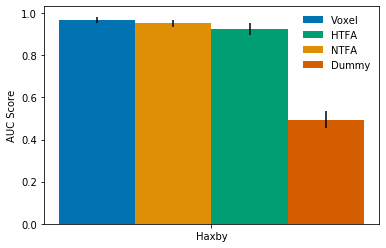

In [154]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_result) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_means) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [155]:
stats.ttest_ind(ntfa_summary_means,dummy_summary_means)

Ttest_indResult(statistic=19.52225383117507, pvalue=2.445184214983588e-31)

In [157]:
### task classification using 5Fold CV on NTFA positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(positive_negative_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means
ntfa_pos_neg_summary_means = ntfa_summary_means
dummy_pos_neg_summary_means = dummy_summary_means

Processing Subject control01
Processing negative
Scores: 0.3500 +- 0.3742
Chance Scores: 0.6000 +- 0.2550
Processing positive
Scores: 0.5000 +- 0.3162
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 0.4250 +- 0.3544
Overall Dummy Score: 0.6000 +- 0.2550


Processing Subject control02
Processing negative
Scores: 0.8500 +- 0.2000
Chance Scores: 0.4000 +- 0.3391
Processing positive
Scores: 0.8500 +- 0.3000
Chance Scores: 0.5000 +- 0.3162
...
Overall Score: 0.8500 +- 0.2550
Overall Dummy Score: 0.4500 +- 0.3317


Processing Subject control03
Processing negative
Scores: 0.7000 +- 0.2915
Chance Scores: 0.6500 +- 0.3391
Processing positive
Scores: 0.8500 +- 0.2000
Chance Scores: 0.4500 +- 0.1000
...
Overall Score: 0.7750 +- 0.2610
Overall Dummy Score: 0.5500 +- 0.2693


Processing Subject control04
Processing negative
Scores: 0.5000 +- 0.3162
Chance Scores: 0.4500 +- 0.1000
Processing positive
Scores: 0.5000 +- 0.4472
Chance Scores: 0.4500 +- 0.3317
...
Overall Score: 0.5000 +- 0.3873
Over

In [158]:
### task classification using 5Fold CV on HTFA positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_positive_negative_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means
htfa_pos_neg_summary_means = htfa_summary_means


Processing Subject control01
Processing negative
Scores: 0.7000 +- 0.4000
Chance Scores: 0.5500 +- 0.1000
Processing positive
Scores: 0.6500 +- 0.3391
Chance Scores: 0.7000 +- 0.2449
...
Overall Score: 0.6750 +- 0.3717
Overall Dummy Score: 0.6250 +- 0.2016


Processing Subject control02
Processing negative
Scores: 0.6500 +- 0.3742
Chance Scores: 0.7000 +- 0.3674
Processing positive
Scores: 0.7000 +- 0.4000
Chance Scores: 0.4500 +- 0.2915
...
Overall Score: 0.6750 +- 0.3881
Overall Dummy Score: 0.5750 +- 0.3544


Processing Subject control03
Processing negative
Scores: 0.6500 +- 0.3742
Chance Scores: 0.8500 +- 0.2000
Processing positive
Scores: 0.8000 +- 0.1871
Chance Scores: 0.4000 +- 0.2000
...
Overall Score: 0.7250 +- 0.3052
Overall Dummy Score: 0.6250 +- 0.3010


Processing Subject control04
Processing negative
Scores: 0.5500 +- 0.3317
Chance Scores: 0.4000 +- 0.3742
Processing positive
Scores: 0.5000 +- 0.3536
Chance Scores: 0.4500 +- 0.2915
...
Overall Score: 0.5250 +- 0.3437
Over

In [159]:
### task classification using 5Fold CV on input data positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(positive_negative_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                 session_labels=None,
                                                                    cv=cv,
                                                                   scoring="roc_auc",
                                                                   input_data=True,
                                                                   print_all=True)

    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means
voxel_pos_neg_summary_means = voxel_summary_means


Processing Subject control01
Processing negative
Scores: 0.3000 +- 0.2915
Chance Scores: 0.2500 +- 0.2236
Processing positive
Scores: 0.3000 +- 0.2915
Chance Scores: 0.4500 +- 0.1000
...
Overall Score: 0.3000 +- 0.2915
Overall Dummy Score: 0.3500 +- 0.2000


Processing Subject control02
Processing negative
Scores: 0.7500 +- 0.2739
Chance Scores: 0.3500 +- 0.2000
Processing positive
Scores: 0.8000 +- 0.2915
Chance Scores: 0.3000 +- 0.1871
...
Overall Score: 0.7750 +- 0.2839
Overall Dummy Score: 0.3250 +- 0.1953


Processing Subject control03
Processing negative
Scores: 0.7000 +- 0.2915
Chance Scores: 0.5500 +- 0.3317
Processing positive
Scores: 0.8000 +- 0.2449
Chance Scores: 0.3500 +- 0.3742
...
Overall Score: 0.7500 +- 0.2739
Overall Dummy Score: 0.4500 +- 0.3674


Processing Subject control04
Processing negative
Scores: 0.3000 +- 0.2449
Chance Scores: 0.5000 +- 0.3536
Processing positive
Scores: 0.3000 +- 0.4000
Chance Scores: 0.6500 +- 0.1225
...
Overall Score: 0.3000 +- 0.3317
Over

Scores: 0.8000 +- 0.2449
Chance Scores: 0.6500 +- 0.2000
...
Overall Score: 0.7500 +- 0.3354
Overall Dummy Score: 0.5750 +- 0.1953


Processing Subject mdd14
Processing negative
Scores: 0.4000 +- 0.4062
Chance Scores: 0.6500 +- 0.3742
Processing positive
Scores: 0.3500 +- 0.3000
Chance Scores: 0.6000 +- 0.2000
...
Overall Score: 0.3750 +- 0.3579
Overall Dummy Score: 0.6250 +- 0.3010


Processing Subject mdd15
Processing negative
Scores: 0.7000 +- 0.4000
Chance Scores: 0.1500 +- 0.2000
Processing positive
Scores: 0.5000 +- 0.3536
Chance Scores: 0.4500 +- 0.2915
...
Overall Score: 0.6000 +- 0.3905
Overall Dummy Score: 0.3000 +- 0.2915


Processing Subject mdd16
Processing negative
Scores: 0.4000 +- 0.4899
Chance Scores: 0.7000 +- 0.3674
Processing positive
Scores: 0.3000 +- 0.4000
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 0.3500 +- 0.4500
Overall Dummy Score: 0.6000 +- 0.3391


Processing Subject mdd17
Processing negative
Scores: 0.6000 +- 0.3391
Chance Scores: 0.4500 +- 0.1000


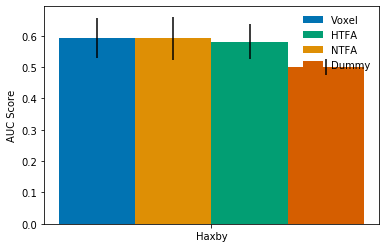

In [160]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_means) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))

pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [161]:
stats.ttest_ind(ntfa_summary_means,dummy_summary_means)

Ttest_indResult(statistic=2.5195497298369562, pvalue=0.013849761364885893)

In [162]:
### task classification using 3Fold CV on NTFA all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.6667 +- 0.2357
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.7083 +- 0.0589
Processing positive_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.5417 +- 0.3281
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.2917 +- 0.1179
...
Overall Score: 0.6875 +- 0.3590
Overall Dummy Score: 0.5521 +- 0.2674


Processing Subject control02
Processing negative_music
Scores: 0.7917 +- 0.2125
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4583 +- 0.2125
Processing positive_music
Scores: 0.5417 +- 0.1559
Chance Scores: 0.4583 +- 0.2569
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.2700
...
Overall Score: 0.7708 +- 0.2329
Overall Dummy Score: 0.4479 +- 0.2251


Processing Subject control03
Processing negative_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing

Scores: 0.4167 +- 0.1179
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.6944 +- 0.2812
Overall Dummy Score: 0.5382 +- 0.1972


Processing Subject mdd04
Processing negative_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.5000 +- 0.2041
Processing negative_sounds
Scores: 0.2917 +- 0.2569
Chance Scores: 0.5000 +- 0.0000
Processing positive_music
Scores: 0.7083 +- 0.0589
Chance Scores: 0.6667 +- 0.2569
Processing positive_sounds
Scores: 0.7083 +- 0.2125
Chance Scores: 0.4583 +- 0.1559
...
Overall Score: 0.6667 +- 0.2946
Overall Dummy Score: 0.5312 +- 0.1985


Skipping Subject, not enough runs
Processing negative_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.2917 +- 0.1179
Processing negative_sounds
Scores: 0.2917 +- 0.2569
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.7083 +- 0.0589
Chance Scores: 0.4583 +- 0.2946
Processing positive_sounds
Scores: 0.7083 +- 0.2125
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.6667 +- 0.2946
Overall Dummy Score: 0.3854 

In [163]:
### task classification using 3Fold CV on HTFA all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_task_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.3333 +- 0.1559
Processing negative_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5417 +- 0.3281
Processing positive_music
Scores: 0.7083 +- 0.0589
Chance Scores: 0.2917 +- 0.0589
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5417 +- 0.3281
...
Overall Score: 0.7500 +- 0.2339
Overall Dummy Score: 0.4271 +- 0.2722


Processing Subject control02
Processing negative_music
Scores: 0.8750 +- 0.1021
Chance Scores: 0.4583 +- 0.1559
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.7083 +- 0.2357
...
Overall Score: 0.8229 +- 0.2070
Overall Dummy Score: 0.5729 +- 0.2132


Processing Subject control03
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.0589
Processing

Scores: 0.8333 +- 0.2357
Chance Scores: 0.2917 +- 0.2125
Processing positive_sounds
Scores: 0.3333 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.6111 +- 0.3391
Overall Dummy Score: 0.3611 +- 0.1396


Processing Subject mdd04
Processing negative_music
Scores: 0.7500 +- 0.0000
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.6667 +- 0.1559
Processing positive_music
Scores: 0.5000 +- 0.0000
Chance Scores: 0.3750 +- 0.2041
Processing positive_sounds
Scores: 0.7917 +- 0.1559
Chance Scores: 0.5000 +- 0.2700
...
Overall Score: 0.6562 +- 0.2112
Overall Dummy Score: 0.4896 +- 0.2192


Skipping Subject, not enough runs
Processing negative_music
Scores: 0.7500 +- 0.0000
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.5000 +- 0.0000
Chance Scores: 0.4167 +- 0.1559
Processing positive_sounds
Scores: 0.7917 +- 0.1559
Chance Score

In [164]:
### task classification using 3Fold CV on input data all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                 session_labels=None,
                                                                    cv=cv,
                                                                   scoring="roc_auc",
                                                                   input_data=True,
                                                                   print_all=True)

    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.7083 +- 0.2569
Chance Scores: 0.4167 +- 0.1559
Processing negative_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.6250 +- 0.2041
Processing positive_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.3333 +- 0.1559
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.6667 +- 0.2125
...
Overall Score: 0.7708 +- 0.1965
Overall Dummy Score: 0.5104 +- 0.2308


Processing Subject control02
Processing negative_music
Scores: 0.8750 +- 0.1021
Chance Scores: 0.6250 +- 0.1021
Processing negative_sounds
Scores: 0.9583 +- 0.0589
Chance Scores: 0.5000 +- 0.3680
Processing positive_music
Scores: 0.7917 +- 0.2125
Chance Scores: 0.5417 +- 0.2357
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.6250 +- 0.1768
...
Overall Score: 0.8229 +- 0.2251
Overall Dummy Score: 0.5729 +- 0.2472


Processing Subject control03
Processing negative_music
Scores: 0.5833 +- 0.2357
Chance Scores: 0.4583 +- 0.0589
Processing

Scores: 0.6667 +- 0.2357
Chance Scores: 0.3750 +- 0.1768
...
Overall Score: 0.8438 +- 0.2558
Overall Dummy Score: 0.4271 +- 0.2070


Processing Subject control20
Processing negative_music
Scores: 0.8750 +- 0.1021
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5417 +- 0.1559
Processing positive_sounds
Scores: 0.7917 +- 0.2946
Chance Scores: 0.5000 +- 0.2700
...
Overall Score: 0.8021 +- 0.2524
Overall Dummy Score: 0.5000 +- 0.1909


Processing Subject mdd01
Processing negative_music
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5833 +- 0.1179
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.6250 +- 0.1768
Processing positive_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.6250 +- 0.2041
Processing positive_sounds
Scores: 0.0833 +- 0.1179
Chance Scores: 0.5833 +- 0.2357
...
Overall Score: 0.6146 +- 0.3589
Overall Dummy Score: 0.6042 +- 0.

Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.8750 +- 0.1614
Overall Dummy Score: 0.6042 +- 0.2273


Processing Subject mdd19
Processing negative_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.6250 +- 0.1021
Processing negative_sounds
Scores: 0.5000 +- 0.0000
Chance Scores: 0.6250 +- 0.1768
Processing positive_music
Scores: 0.6250 +- 0.4449
Chance Scores: 0.3333 +- 0.1559
Processing positive_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.7083 +- 0.2902
Overall Dummy Score: 0.5312 +- 0.2112


...
Voxel Summary Score Across Subjects, For Category negative_music : 0.7799 +- 0.2659
Voxel Summary Score Across Subjects, For Category positive_music : 0.7269 +- 0.2674
Voxel Summary Score Across Subjects, For Category positive_sounds : 0.7126 +- 0.2997
Voxel Summary Score Across Subjects, For Category negative_sounds : 0.7269 +- 0.2588
...
Vo

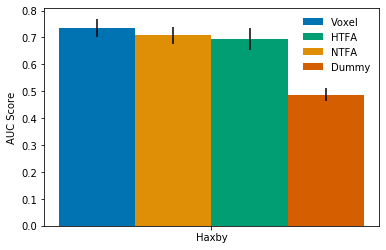

In [165]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_means) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))

pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [166]:
### task classification using 3Fold CV on NTFA music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_mus_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.0833 +- 0.1179
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.3333 +- 0.2764


Processing Subject control02
Processing negative_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
Processing positive_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.3750 +- 0.3461


Processing Subject control03
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.2795


Processing Subject control04
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 1.0000 +- 0.0000
Processing positive_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.9167 +-

Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.3750 +- 0.3461


Processing Subject mdd13
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.1667 +- 0.2357
...
Overall Score: 0.9167 +- 0.1179
Overall Dummy Score: 0.3750 +- 0.2795


Processing Subject mdd14
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.0833 +- 0.1179
Overall Dummy Score: 0.5833 +- 0.1863


Processing Subject mdd15
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3750 +- 0.3461


Processing Subject mdd16
Processing negative_music
Scores: 0.4167 

In [182]:
### task classification using 3Fold CV on HTFA music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

htfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
htfa_mus_summary_means = summary_subject_means
dummy_mus_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.4082
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4583 +- 0.3656


Processing Subject control02
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.4167 +- 0.3118
Processing positive_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.0833 +- 0.1179
Overall Dummy Score: 0.5417 +- 0.3033


Processing Subject control03
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.8333 +- 0.2357
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.9167 +- 0.1179
Overall Dummy Score: 0.7083 +- 0.3033


Processing Subject control04
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.2500 +- 0.3536
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +-

In [168]:
### task classification using 3Fold CV on Input data music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   input_data = True,
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("VoxelSummary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

voxel_summary_result = summary_result
dummy_summary_result = summary_result_chance
voxel_mus_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.4714
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.3750 +- 0.4018


Processing Subject control02
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.5833 +- 0.4249
Processing positive_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.0833 +- 0.1179
Overall Dummy Score: 0.6250 +- 0.3461


Processing Subject control03
Processing negative_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.3750 +- 0.1909


Processing Subject control04
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.8333 +- 0.2357
Processing positive_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.9167 +-

Scores: 0.1667 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.4167 +- 0.2357


Processing Subject mdd12
Processing negative_music
Scores: 0.1667 +- 0.2357
Chance Scores: 0.6667 +- 0.4714
Processing positive_music
Scores: 0.1667 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.5417 +- 0.4187


Processing Subject mdd13
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.3333 +- 0.2357
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.9167 +- 0.1179
Overall Dummy Score: 0.2917 +- 0.2244


Processing Subject mdd14
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.4167 +- 0.3118
Processing positive_music
Scores: 0.0833 +- 0.1179
Chance Scores: 1.0000 +- 0.0000
...
Overall Score: 0.0833 +- 0.1179
Overall Dummy Score: 0.7083 +- 0.3656


Processing Subject mdd15
Processing negative_music
Scores: 1.0000 

In [169]:
### task classification using 3Fold CV on NTFA sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_sounds_summary_means = summary_subject_means
dummy_sounds_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.8333 +- 0.2357
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.7500 +- 0.2500


Processing Subject control02
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.4583 +- 0.3033


Processing Subject control03
Processing negative_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.3118
Processing positive_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5000 +- 0.3227


Processing Subject control04
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0

Scores: 0.5833 +- 0.4249
Chance Scores: 0.8333 +- 0.2357
...
Overall Score: 0.5833 +- 0.4249
Overall Dummy Score: 0.5417 +- 0.3656


Processing Subject mdd12
Processing negative_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.2500 +- 0.2041
Processing positive_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.8333 +- 0.2357
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.5417 +- 0.3656


Processing Subject mdd13
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.2500 +- 0.2041
Processing positive_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.9167 +- 0.1179
Overall Dummy Score: 0.3750 +- 0.1909


Processing Subject mdd14
Processing negative_sounds
Scores: 0.4167 +- 0.4249
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
Scores: 0.4167 +- 0.4249
Chance Scores: 0.8333 +- 0.2357
...
Overall Score: 0.4167 +- 0.4249
Overall Dummy Score: 0.5833 +- 0.3436


Processing Subject mdd15
Processing negative_sounds
Scores: 

In [170]:
### task classification using 3Fold CV on HTFA sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

htfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
htfa_sounds_summary_means = summary_subject_means

Processing Subject control01
Processing negative_sounds
Scores: 0.4167 +- 0.4249
Chance Scores: 0.5833 +- 0.4249
Processing positive_sounds
Scores: 0.4167 +- 0.4249
Chance Scores: 0.1667 +- 0.2357
...
Overall Score: 0.4167 +- 0.4249
Overall Dummy Score: 0.3750 +- 0.4018


Processing Subject control02
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.0000
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.3536
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.2795


Processing Subject control03
Processing negative_sounds
Scores: 0.5833 +- 0.4249
Chance Scores: 0.2500 +- 0.2041
Processing positive_sounds
Scores: 0.5833 +- 0.4249
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.5833 +- 0.4249
Overall Dummy Score: 0.4167 +- 0.2357


Processing Subject control04
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.8333 +- 0.2357
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0

Scores: 0.1667 +- 0.2357
Chance Scores: 0.2500 +- 0.3536
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.3333 +- 0.3436


Processing Subject mdd12
Processing negative_sounds
Scores: 0.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.4249
Processing positive_sounds
Scores: 0.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.5833 +- 0.3727


Processing Subject mdd13
Processing negative_sounds
Scores: 0.5833 +- 0.4249
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
Scores: 0.5833 +- 0.4249
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 0.5833 +- 0.4249
Overall Dummy Score: 0.5000 +- 0.2887


Processing Subject mdd14
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5417 +- 0.2244


Processing Subject mdd15
Processing negative_sounds
Scores: 

In [171]:
### task classification using 3Fold CV on Input data sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   input_data = True,
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("VoxelSummary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

voxel_summary_result = summary_result
dummy_summary_result = summary_result_chance
voxel_sounds_summary_means = summary_subject_means

Processing Subject control01
Processing negative_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.4167 +- 0.4249
Processing positive_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.4583 +- 0.3033


Processing Subject control02
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.8333 +- 0.2357
Processing positive_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.7083 +- 0.3033


Processing Subject control03
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.0000
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.9167 +- 0.1179
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.7083 +- 0.2244


Processing Subject control04
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0

Scores: 0.9167 +- 0.1179
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.9167 +- 0.1179
Overall Dummy Score: 0.7500 +- 0.2041


Processing Subject mdd12
Processing negative_sounds
Scores: 0.7500 +- 0.3536
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
Scores: 0.7500 +- 0.3536
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.7500 +- 0.3536
Overall Dummy Score: 0.5000 +- 0.2887


Processing Subject mdd13
Processing negative_sounds
Scores: 0.5833 +- 0.4249
Chance Scores: 0.2500 +- 0.2041
Processing positive_sounds
Scores: 0.5833 +- 0.4249
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.5833 +- 0.4249
Overall Dummy Score: 0.4167 +- 0.3118


Processing Subject mdd14
Processing negative_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
Processing positive_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Sc

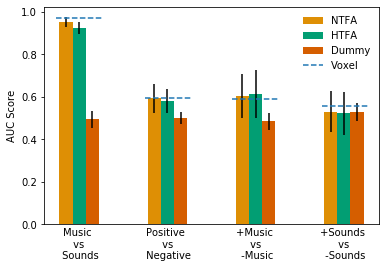

In [243]:
confidence = 0.95
voxel_mus_sounds_accuracies = np.mean(voxel_mus_sounds_summary_means)
voxel_mus_sounds_errs = stats.sem(voxel_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_mus_sounds_summary_means) - 1)
htfa_mus_sounds_accuracies = np.mean(htfa_mus_sounds_summary_means)
htfa_mus_sounds_errs = stats.sem(htfa_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_mus_sounds_summary_means) - 1)
ntfa_mus_sounds_accuracies = np.mean(ntfa_mus_sounds_summary_means)
ntfa_mus_sounds_errs = stats.sem(ntfa_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_mus_sounds_summary_means) - 1)
dummy_mus_sounds_accuracies = np.mean(dummy_mus_sounds_summary_means)
dummy_mus_sounds_errs = stats.sem(dummy_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(dummy_mus_sounds_summary_means) - 1)

voxel_pos_neg_accuracies = np.mean(voxel_pos_neg_summary_means)
voxel_pos_neg_errs = stats.sem(voxel_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_pos_neg_summary_means) - 1)
htfa_pos_neg_accuracies = np.mean(htfa_pos_neg_summary_means)
htfa_pos_neg_errs = stats.sem(htfa_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_pos_neg_summary_means) - 1)
ntfa_pos_neg_accuracies = np.mean(ntfa_pos_neg_summary_means)
ntfa_pos_neg_errs = stats.sem(ntfa_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_pos_neg_summary_means) - 1)
dummy_pos_neg_accuracies = np.mean(dummy_pos_neg_summary_means)
dummy_pos_neg_errs = stats.sem(dummy_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                          len(dummy_pos_neg_summary_means) - 1)
voxel_mus_accuracies = np.mean(voxel_mus_summary_means)
voxel_mus_errs = stats.sem(voxel_mus_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_mus_summary_means) - 1)
htfa_mus_accuracies = np.mean(htfa_mus_summary_means)
htfa_mus_errs = stats.sem(htfa_mus_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_mus_summary_means) - 1)
ntfa_mus_accuracies = np.mean(ntfa_mus_summary_means)
ntfa_mus_errs = stats.sem(ntfa_mus_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_mus_summary_means) - 1)
dummy_mus_accuracies = np.mean(dummy_mus_summary_means)
dummy_mus_errs = stats.sem(dummy_mus_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(dummy_mus_summary_means) - 1)

voxel_sounds_accuracies = np.mean(voxel_sounds_summary_means)
voxel_sounds_errs = stats.sem(voxel_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_sounds_summary_means) - 1)
htfa_sounds_accuracies = np.mean(htfa_sounds_summary_means)
htfa_sounds_errs = stats.sem(htfa_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_sounds_summary_means) - 1)
ntfa_sounds_accuracies = np.mean(ntfa_sounds_summary_means)
ntfa_sounds_errs = stats.sem(ntfa_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_sounds_summary_means) - 1)
dummy_sounds_accuracies = np.mean(dummy_sounds_summary_means)
dummy_sounds_errs = stats.sem(dummy_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(dummy_sounds_summary_means) - 1)

datasets = ['Music \n vs \n Sounds','Positive \n vs \n Negative',
            '+Music \n vs \n -Music','+Sounds \n vs \n -Sounds'] 

# datasets = ['Music v Sound','Positive v Negative',
#             '+Music v -Music','+Sounds v -Sounds'] 

voxel_accuracies = [voxel_mus_sounds_accuracies,voxel_pos_neg_accuracies,
                    voxel_mus_accuracies,voxel_sounds_accuracies]
voxel_errs = [voxel_mus_sounds_errs, voxel_pos_neg_errs, 
              voxel_mus_errs, voxel_sounds_errs]
htfa_accuracies = [htfa_mus_sounds_accuracies,htfa_pos_neg_accuracies,
                    htfa_mus_accuracies,htfa_sounds_accuracies]
htfa_errs = [htfa_mus_sounds_errs, htfa_pos_neg_errs, 
              htfa_mus_errs, htfa_sounds_errs]
ntfa_accuracies = [ntfa_mus_sounds_accuracies,ntfa_pos_neg_accuracies,
                    ntfa_mus_accuracies,ntfa_sounds_accuracies]
ntfa_errs = [ntfa_mus_sounds_errs, ntfa_pos_neg_errs, 
             ntfa_mus_errs, ntfa_sounds_errs]
dummy_accuracies = [dummy_mus_sounds_accuracies,dummy_pos_neg_accuracies,
                    dummy_mus_accuracies,dummy_sounds_accuracies] 
dummy_errs = [dummy_mus_sounds_errs, dummy_pos_neg_errs, 
             dummy_mus_errs, dummy_sounds_errs]
xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.15
fig = pl.figure()
ax = fig.add_subplot(111)
# voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + 0*bar_width, height=ntfa_accuracies, color=colorblind_colors[1], 
                  width=bar_width, yerr=ntfa_errs,label='NTFA')
htfa_bar = pl.bar(xs + 1*bar_width, height=htfa_accuracies, color=colorblind_colors[2], 
                  width=bar_width, yerr=htfa_errs,label='HTFA')
dummy_bar = pl.bar(xs + 2*bar_width, height=dummy_accuracies, color=colorblind_colors[3], 
                   width=bar_width, yerr=dummy_errs,label='Dummy')
ax.axhline(voxel_accuracies[0],xmin=0.035,xmax=0.175,linestyle='dashed',label='Voxel')
ax.axhline(voxel_accuracies[1],xmin=0.30,xmax=0.44,linestyle='dashed')
ax.axhline(voxel_accuracies[2],xmin=0.56,xmax=0.70,linestyle='dashed')
ax.axhline(voxel_accuracies[3],xmin=0.83,xmax=0.97,linestyle='dashed')
handles, labels = ax.get_legend_handles_labels()
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
new_labels = ['NTFA','HTFA','Dummy','Voxel']
new_handles = [handles[1],handles[2],handles[3],handles[0]]
# ax.set_xticks(xs+bar_width)
# pl.xticks(xs+0*bar_width, datasets)
# pl.xticks([0,1+bar_width,2+bar_width,3+bar_width], datasets)
ax.set_xticks(xs+1*bar_width)
ax.tick_params(axis='x',bottom=False,pad=0)
ax.set_xticklabels(datasets)
pl.legend(new_handles, new_labels)

pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('lepping_svm_accuracies_ci.pdf')

In [244]:
from scipy.stats import pearsonr
from scipy.special import betainc
def corrcoef(matrix):
    r = np.corrcoef(matrix)
    rf = r[np.triu_indices(r.shape[0], 1)]
    df = matrix.shape[1] - 2
    ts = rf * rf * (df / (1 - rf * rf))
    pf = betainc(0.5 * df, 0.5, df / (df + ts))
    p = np.zeros(shape=r.shape)
    p[np.triu_indices(p.shape[0], 1)] = pf
    p[np.tril_indices(p.shape[0], -1)] = p.T[np.tril_indices(p.shape[0], -1)]
    p[np.diag_indices(p.shape[0])] = np.ones(p.shape[0])
    return r, p


In [248]:
### functional connectivity using NTFA ###

all_factor_centers = dtfa_hyperparams['factor_centers']['mu'].data.numpy()
all_factor_widths = np.exp(dtfa_hyperparams['factor_log_widths']['mu'].data.numpy())

negative_music_matrix = []
positive_music_matrix = []
negative_sounds_matrix = []
positive_sounds_matrix = []

all_matrix = []

negative_music_matrix_p = []
positive_music_matrix_p = []
negative_sounds_matrix_p = []
positive_sounds_matrix_p = []
all_matrix_p = []

for i in range(dtfa.num_blocks):
    r,p = corrcoef(all_weights_dtfa[i,:,:].T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
    if block_task_labeler(dtfa._blocks[i]) == 'negative_music':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        negative_music_matrix.append(r)
        negative_music_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'positive_music':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        positive_music_matrix.append(r)
        positive_music_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'negative_sounds':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        negative_sounds_matrix.append(r)
        negative_sounds_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'positive_sounds':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        positive_sounds_matrix.append(r)
        positive_sounds_matrix_p.append(p)
    else:
        print ('Something is WRONG!!!')

        
negative_music_matrix = np.array(negative_music_matrix)
positive_music_matrix = np.array(positive_music_matrix)
negative_sounds_matrix = np.array(negative_sounds_matrix)
positive_sounds_matrix = np.array(positive_sounds_matrix)

all_matrix = np.array(all_matrix)
        
negative_music_matrix_p = np.array(negative_music_matrix_p)
positive_music_matrix_p = np.array(positive_music_matrix_p)
negative_sounds_matrix_p = np.array(negative_sounds_matrix_p)
positive_sounds_matrix_p = np.array(positive_sounds_matrix_p)
all_matrix_p = np.array(all_matrix_p)

negative_music_matrix = negative_music_matrix * negative_music_matrix_p
positive_music_matrix = positive_music_matrix * positive_music_matrix_p
negative_sounds_matrix = negative_sounds_matrix * negative_sounds_matrix_p
positive_sounds_matrix = positive_sounds_matrix * positive_sounds_matrix_p

all_matrix = all_matrix * all_matrix


all_vectors = np.zeros(shape=(all_matrix.shape[0],4950))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],4950))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

negative_music_vectors = np.zeros(shape=(negative_music_matrix.shape[0],4950))
negative_music_vectors_p = np.zeros(shape=(negative_music_matrix_p.shape[0],4950))

for i in range(negative_music_matrix.shape[0]):
    negative_music_vectors[i,:] = distance.squareform(negative_music_matrix[i,:,:],checks=False)
    negative_music_vectors_p[i,:] = distance.squareform(negative_music_matrix_p[i,:,:],checks=False)

positive_music_vectors = np.zeros(shape=(positive_music_matrix.shape[0],4950))
positive_music_vectors_p = np.zeros(shape=(positive_music_matrix_p.shape[0],4950))

for i in range(positive_music_matrix.shape[0]):
    positive_music_vectors[i,:] = distance.squareform(positive_music_matrix[i,:,:],checks=False)
    positive_music_vectors_p[i,:] = distance.squareform(positive_music_matrix_p[i,:,:],checks=False)

    
negative_sounds_vectors = np.zeros(shape=(negative_sounds_matrix.shape[0],4950))
negative_sounds_vectors_p = np.zeros(shape=(negative_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    negative_sounds_vectors[i,:] = distance.squareform(negative_sounds_matrix[i,:,:],checks=False)
    negative_sounds_vectors_p[i,:] = distance.squareform(negative_sounds_matrix_p[i,:,:],checks=False)
    
positive_sounds_vectors = np.zeros(shape=(positive_sounds_matrix.shape[0],4950))
positive_sounds_vectors_p = np.zeros(shape=(positive_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    positive_sounds_vectors[i,:] = distance.squareform(positive_sounds_matrix[i,:,:],checks=False)
    positive_sounds_vectors_p[i,:] = distance.squareform(positive_sounds_matrix_p[i,:,:],checks=False)

    
negative_music_vectors_mean = negative_music_vectors.mean(0)
negative_music_vectors_std = negative_music_vectors.std(0)
positive_music_vectors_mean = positive_music_vectors.mean(0)
positive_music_vectors_std = positive_music_vectors.std(0)
negative_sounds_vectors_mean = negative_sounds_vectors.mean(0)
negative_sounds_vectors_std = negative_sounds_vectors.std(0)
positive_sounds_vectors_mean = positive_sounds_vectors.mean(0)
positive_sounds_vectors_std = positive_sounds_vectors.std(0)

In [251]:
### task classification using 3Fold CV on NTFA all tasks with FC###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_vectors[i])
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
Scores: 0.3333 +- 0.2357
Chance Scores: 0.6250 +- 0.2041
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.4167 +- 0.2357
Chance Scores: 0.4167 +- 0.1559
Processing positive_sounds
Scores: 0.5417 +- 0.1559
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.5104 +- 0.2625
Overall Dummy Score: 0.4792 +- 0.1898


Processing Subject control02
Processing negative_music
Scores: 0.7500 +- 0.0000
Chance Scores: 0.5417 +- 0.2569
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.7083 +- 0.0589
Chance Scores: 0.6250 +- 0.1768
Processing positive_sounds
Scores: 0.7083 +- 0.2125
Chance Scores: 0.5833 +- 0.2569
...
Overall Score: 0.7708 +- 0.1517
Overall Dummy Score: 0.5833 +- 0.2125


Processing Subject control03
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.3333 +- 0.0589
Processing

Processing negative_music
Scores: 0.3194 +- 0.0520
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
Scores: 0.2361 +- 0.1678
Chance Scores: 0.3333 +- 0.1179
Processing positive_music
Scores: 0.7083 +- 0.2569
Chance Scores: 0.2778 +- 0.0393
Processing positive_sounds
Scores: 0.0833 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.3368 +- 0.2844
Overall Dummy Score: 0.4549 +- 0.2141


Processing Subject mdd04
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3333 +- 0.1559
Processing positive_music
Scores: 0.3750 +- 0.4449
Chance Scores: 0.5417 +- 0.2357
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.4896 +- 0.4160
Overall Dummy Score: 0.4688 +- 0.2112


Skipping Subject, not enough runs
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.6

In [252]:
### functional connectivity using HTFA ###



negative_music_matrix = []
positive_music_matrix = []
negative_sounds_matrix = []
positive_sounds_matrix = []

all_matrix = []

negative_music_matrix_p = []
positive_music_matrix_p = []
negative_sounds_matrix_p = []
positive_sounds_matrix_p = []
all_matrix_p = []

for i in range(htfa.num_blocks):
    r,p = corrcoef(all_weights_htfa[i,:,:].T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
    if block_task_labeler(htfa._blocks[i]) == 'negative_music':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        negative_music_matrix.append(r)
        negative_music_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'positive_music':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        positive_music_matrix.append(r)
        positive_music_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'negative_sounds':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        negative_sounds_matrix.append(r)
        negative_sounds_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'positive_sounds':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        positive_sounds_matrix.append(r)
        positive_sounds_matrix_p.append(p)
    else:
        print ('Something is WRONG!!!')

        
negative_music_matrix = np.array(negative_music_matrix)
positive_music_matrix = np.array(positive_music_matrix)
negative_sounds_matrix = np.array(negative_sounds_matrix)
positive_sounds_matrix = np.array(positive_sounds_matrix)

all_matrix = np.array(all_matrix)
        
negative_music_matrix_p = np.array(negative_music_matrix_p)
positive_music_matrix_p = np.array(positive_music_matrix_p)
negative_sounds_matrix_p = np.array(negative_sounds_matrix_p)
positive_sounds_matrix_p = np.array(positive_sounds_matrix_p)
all_matrix_p = np.array(all_matrix_p)

negative_music_matrix = negative_music_matrix * negative_music_matrix_p
positive_music_matrix = positive_music_matrix * positive_music_matrix_p
negative_sounds_matrix = negative_sounds_matrix * negative_sounds_matrix_p
positive_sounds_matrix = positive_sounds_matrix * positive_sounds_matrix_p

all_matrix = all_matrix * all_matrix


all_vectors = np.zeros(shape=(all_matrix.shape[0],4950))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],4950))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

negative_music_vectors = np.zeros(shape=(negative_music_matrix.shape[0],4950))
negative_music_vectors_p = np.zeros(shape=(negative_music_matrix_p.shape[0],4950))

for i in range(negative_music_matrix.shape[0]):
    negative_music_vectors[i,:] = distance.squareform(negative_music_matrix[i,:,:],checks=False)
    negative_music_vectors_p[i,:] = distance.squareform(negative_music_matrix_p[i,:,:],checks=False)

positive_music_vectors = np.zeros(shape=(positive_music_matrix.shape[0],4950))
positive_music_vectors_p = np.zeros(shape=(positive_music_matrix_p.shape[0],4950))

for i in range(positive_music_matrix.shape[0]):
    positive_music_vectors[i,:] = distance.squareform(positive_music_matrix[i,:,:],checks=False)
    positive_music_vectors_p[i,:] = distance.squareform(positive_music_matrix_p[i,:,:],checks=False)

    
negative_sounds_vectors = np.zeros(shape=(negative_sounds_matrix.shape[0],4950))
negative_sounds_vectors_p = np.zeros(shape=(negative_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    negative_sounds_vectors[i,:] = distance.squareform(negative_sounds_matrix[i,:,:],checks=False)
    negative_sounds_vectors_p[i,:] = distance.squareform(negative_sounds_matrix_p[i,:,:],checks=False)
    
positive_sounds_vectors = np.zeros(shape=(positive_sounds_matrix.shape[0],4950))
positive_sounds_vectors_p = np.zeros(shape=(positive_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    positive_sounds_vectors[i,:] = distance.squareform(positive_sounds_matrix[i,:,:],checks=False)
    positive_sounds_vectors_p[i,:] = distance.squareform(positive_sounds_matrix_p[i,:,:],checks=False)

    
negative_music_vectors_mean = negative_music_vectors.mean(0)
negative_music_vectors_std = negative_music_vectors.std(0)
positive_music_vectors_mean = positive_music_vectors.mean(0)
positive_music_vectors_std = positive_music_vectors.std(0)
negative_sounds_vectors_mean = negative_sounds_vectors.mean(0)
negative_sounds_vectors_std = negative_sounds_vectors.std(0)
positive_sounds_vectors_mean = positive_sounds_vectors.mean(0)
positive_sounds_vectors_std = positive_sounds_vectors.std(0)

In [255]:
### task classification using 3Fold CV on HTFA all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(htfa.num_blocks):
#             if i not in validation_blocks:
            block = htfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_vectors[i])
                targets.append(block_task_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
Scores: 0.7083 +- 0.0589
Chance Scores: 0.4167 +- 0.2357
Processing positive_music
Scores: 0.1667 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.1559
...
Overall Score: 0.5312 +- 0.3312
Overall Dummy Score: 0.4688 +- 0.1702


Processing Subject control02
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds
Scores: 0.1250 +- 0.1021
Chance Scores: 0.7500 +- 0.3536
Processing positive_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.6667 +- 0.1559
Processing positive_sounds
Scores: 0.4167 +- 0.4249
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 0.5417 +- 0.4093
Overall Dummy Score: 0.6562 +- 0.2289


Processing Subject control03
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.6250 +- 0.1021
Processing

Scores: 0.6667 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.4757 +- 0.3353
Overall Dummy Score: 0.4583 +- 0.1154


Processing Subject mdd04
Processing negative_music
Scores: 0.1250 +- 0.1768
Chance Scores: 0.5000 +- 0.1768
Processing negative_sounds
Scores: 0.7917 +- 0.2125
Chance Scores: 0.5000 +- 0.2700
Processing positive_music
Scores: 0.4167 +- 0.4249
Chance Scores: 0.6250 +- 0.2041
Processing positive_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.5625 +- 0.4067
Overall Dummy Score: 0.4896 +- 0.2192


Skipping Subject, not enough runs
Processing negative_music
Scores: 0.1250 +- 0.1768
Chance Scores: 0.5833 +- 0.3118
Processing negative_sounds
Scores: 0.7917 +- 0.2125
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.4167 +- 0.4249
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.2569
...
Overall Score: 0.5625 +- 0.4067
Overall Dummy Score: 0.5417 